In [57]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2hsv
from skimage.feature import structure_tensor_eigvals, structure_tensor, hessian_matrix_eigvals,hessian_matrix,hog
from scipy.ndimage import gaussian_filter,gaussian_laplace,gaussian_gradient_magnitude
from skimage.filters.rank import entropy
import warnings
warnings.filterwarnings('ignore')

In [58]:
Image_filename="/home/thanos/Desktop/MLCV/E08/CITYSCAPE/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000031_000019_leftImg8bit.png"
I=imread(Image_filename)

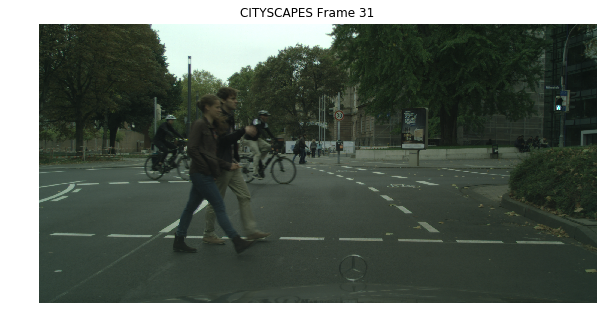

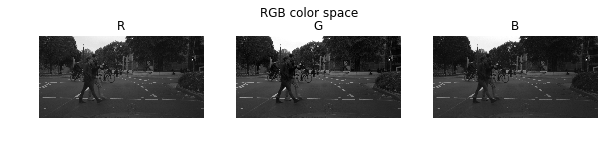

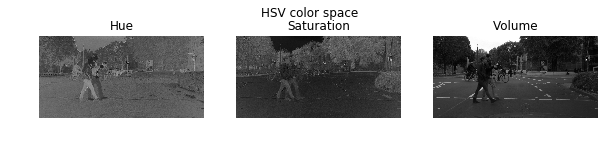

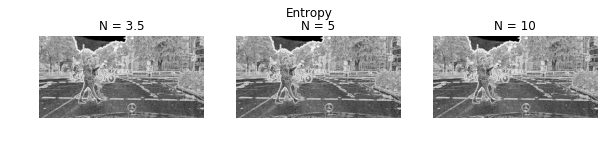

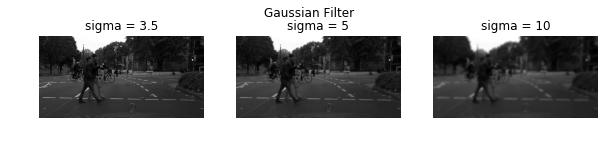

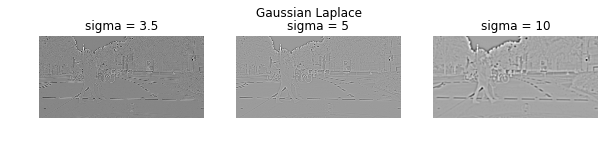

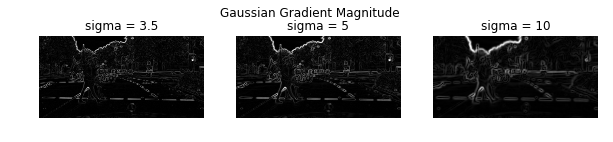

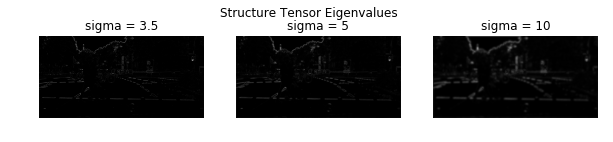

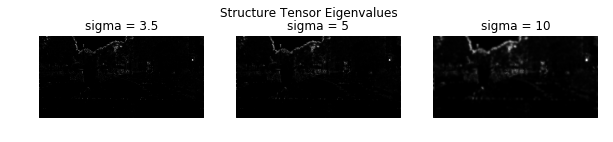

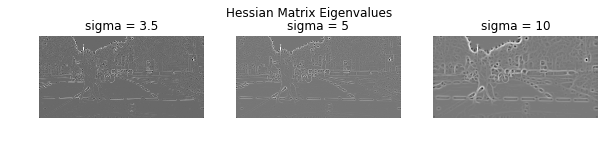

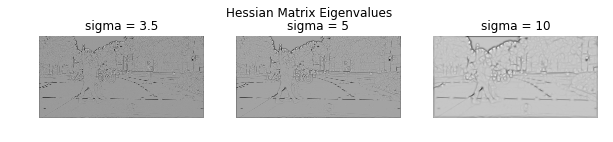

In [59]:
plt.figure(figsize=(10,10))
plt.suptitle("CITYSCAPES Frame 31 ",y=0.72, fontsize=12)
plt.imshow(I)
plt.axis("off")
plt.savefig('Features_Original_Image.png')
plt.show
# RGB - Color Information
R=I[:,:,0]
G=I[:,:,1]
B=I[:,:,2]
plt.figure(figsize=(10,10))
plt.suptitle("RGB color space",y=0.6, fontsize=12)
plt.subplot(131).axis("off")
plt.imshow(R, cmap='gray')
plt.title('R')
plt.subplot(132).axis("off")
plt.imshow(G, cmap='gray')
plt.title('G')
plt.subplot(133).axis("off")
plt.imshow(B, cmap='gray')
plt.title('B')
plt.savefig('Features_RGB.png')
plt.show()            
# HSV - Color Information
img_hsv=rgb2hsv(I)
H=img_hsv[:,:,0]
S=img_hsv[:,:,1]
V=img_hsv[:,:,2]
    
plt.figure(figsize=(10,10))
plt.axis("off")
plt.suptitle("HSV color space",y=0.6, fontsize=12)
plt.subplot(131).axis("off")
plt.imshow(H, cmap='gray')
plt.title('Hue')
plt.subplot(132).axis("off")
plt.imshow(S, cmap='gray')
plt.title('Saturation')
plt.subplot(133).axis("off")
plt.imshow(V, cmap='gray')
plt.title('Volume')
plt.savefig('Features_HSV.png')
plt.show()    

# ENTROPY
    
N=[3,9,17]

f = plt.figure(figsize=(10,10))
plt.suptitle("Entropy",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    E=entropy(V,selem=np.ones([n,n]))
    E=E/np.max(E)
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(E, cmap='gray')
    plt.title("N = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Entropy.png')    
plt.show()        
    
# GAUSSIAN
    
sigmas = [3.5, 5,10]
f = plt.figure(figsize=(10,10))
plt.suptitle("Gaussian Filter",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    Gaussian = gaussian_filter(V, sigma=sigma)
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(Gaussian, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Gaussian.png')    
plt.show()       
        
# GAUSSIAN LAPLACE

f = plt.figure(figsize=(10,10))
plt.suptitle("Gaussian Laplace",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    Gaus_Lapl = gaussian_laplace(V, sigma=sigma)
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(Gaus_Lapl, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Gaussian_Laplace.png')    
plt.show()           
        
# GAUSSIAN GRADIENT MAGNITUDE

f = plt.figure(figsize=(10,10))
plt.suptitle("Gaussian Gradient Magnitude",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    GGM = gaussian_gradient_magnitude(V, sigma=sigma)
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(GGM, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Gaussian_Gradient_Magnitude.png')    
plt.show()               
    
# STRUCTURE TENSOR
f = plt.figure(figsize=(10,10))
plt.suptitle("Structure Tensor Eigenvalues",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    st_1,st_2= structure_tensor_eigvals(*structure_tensor(V, sigma))
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(st_1, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Structure_Tensor_1.png')    
plt.show()

f = plt.figure(figsize=(10,10))
plt.suptitle("Structure Tensor Eigenvalues",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    st_1,st_2= structure_tensor_eigvals(*structure_tensor(V, sigma))
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(st_2, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Structure_Tensor_2.png')    
plt.show()         

# HESSIAN MATRIX

f = plt.figure(figsize=(10,10))
plt.suptitle("Hessian Matrix Eigenvalues",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    h_1,h_2 = hessian_matrix_eigvals(*hessian_matrix(V, sigma, order="rc"))
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(h_1, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Hessian_Matrix_1.png')    
plt.show()       

f = plt.figure(figsize=(10,10))
plt.suptitle("Hessian Matrix Eigenvalues",y=0.6, fontsize=12)
for i, sigma in enumerate(sigmas):
    h_1,h_2 = hessian_matrix_eigvals(*hessian_matrix(V, sigma, order="rc"))
    ax = f.add_subplot(1, len(sigmas), i+1) 
    ax.imshow(h_2, cmap='gray')
    plt.title("sigma = {}".format(sigma))
    ax.axis("off")
plt.savefig('Features_Hessian_Matrix_2.png')    
plt.show()         
